# Linear Regression

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [81]:
data_in = pd.read_csv('Data_in.txt')

In [82]:
data_in.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model year  origin                    car 0me  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino

In [83]:
data_in['mpg'] = data_in['mpg'].apply(lambda a:float(a))
data_in['cylinders'] = data_in['cylinders'].apply(lambda a:float(a))
data_in['displacement'] = data_in['displacement'].apply(lambda a:float(a))
data_in['horsepower'] = data_in['horsepower'].apply(lambda a:float(a))
data_in['weight'] = data_in['weight'].apply(lambda a:float(a))
data_in['acceleration'] = data_in['acceleration'].apply(lambda a:float(a))
data_in['model year'] = data_in['model year'].apply(lambda a:float(a))
data_in['origin'] = data_in['origin'].apply(lambda a:float(a))

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [123]:
lm = LinearRegression()

# UniVariate

In [132]:
X_uni = np.array(data_in['displacement'])
y_uni = np.array(data_in['mpg'])
X_uni= X_uni.reshape(len(X_uni),1)
y_uni= y_uni.reshape(len(y_uni),1)

In [133]:
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, y_uni, test_size=0.2, random_state=101)

In [134]:
lm.fit(X_train_uni,y_train_uni)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
lm.coef_

array([[-0.05916751]])

In [137]:
lm.intercept_

array([34.42974959])

In [147]:
predictions = lm.predict( X_test_uni)

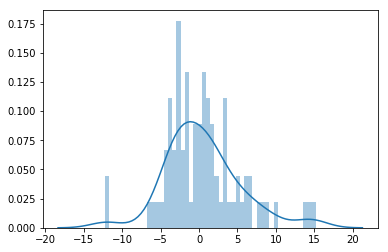

In [150]:
sns.distplot((y_test_uni-predictions),bins=50)

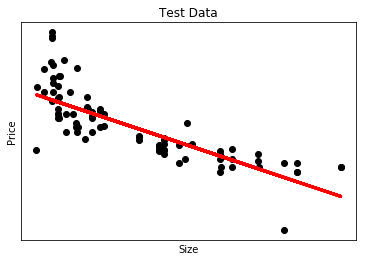

In [148]:
plt.scatter(X_test_uni, y_test_uni,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
plt.plot(X_test_uni,predictions, color='red',linewidth=3)
plt.show()

In [151]:
print('MAE:', metrics.mean_absolute_error(y_test_uni, predictions))
print('MSE:', metrics.mean_squared_error(y_test_uni, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_uni, predictions)))

MAE: 3.6068294797163936
MSE: 23.96454532958207
RMSE: 4.895359571020506


# Multi-Variate

In [85]:
X = data_in[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = data_in['mpg']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [89]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
cylinders       -0.881631
displacement     0.026539
horsepower      -0.015571
weight          -0.006585
acceleration     0.043068
model year       0.848662
origin           1.414597

In [101]:
lm.intercept_

-23.33161721352766

In [91]:
predictions = lm.predict( X_test)

In [92]:
predictions

array([14.60207717, 17.23765784, 12.38504666, 29.62494142, 19.8468807 ,
       29.85319091, 19.24168574, 22.00950916, 34.7703202 , 20.12954886,
       27.2714776 , 31.15059173, 31.29551327, 26.58257204, 25.78616444,
       21.90864616, 16.08428583, 29.41304145, 25.90150201, 24.75833116,
       29.53770772, 19.11848357, 22.70321882, 20.21611967, 20.26231069,
       20.64269387, 24.08157609, 22.53853605, 34.82754303, 30.10674452,
       35.78201323, 17.58810809, 20.12202733, 25.34513444, 12.43818365,
       32.7106336 , 10.30155201, 26.05971865, 24.77273983, 30.44649783,
       30.2499197 , 27.34508209, 16.03861337, 26.52831333, 36.11833152,
       32.7706014 , 27.84570389, 25.20796858, 29.35318675, 26.57613056,
       29.8737401 , 23.79861659, 10.38290318, 23.87802309, 30.00860765,
       26.11766582, 12.19969454, 22.36819091, 22.69506742, 32.11881638,
       16.8818996 , 23.4773707 , 24.28686666,  5.84717351, 14.01278584,
       29.51885942, 29.05253062, 21.62684093, 31.55928157, 26.49

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.9202924965716615
MSE: 16.27283979696102
RMSE: 4.033960807563829


RESIDUAL HISTOGRAM

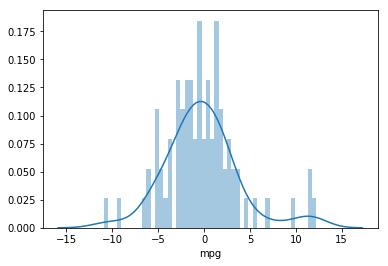

In [105]:
sns.distplot((y_test-predictions),bins=50)